<a href="https://colab.research.google.com/github/h-leyy/ashley-data-portfolio/blob/main/Projet_pyhton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Python: base de données médicale





🏥 Mise en contexte :

Les données utilisées dans le cadre de ce projet proviennent de la base "Hospital Admissions Data" disponible sur Kaggle. Elles ont été collectées entre le 1er avril 2017 et le 31 mars 2019 à l’Hero DMC Heart Institute, un hôpital universitaire de soins tertiaires situé à Ludhiana, au Punjab, en Inde.

🎯 Objectifs de l’analyse

L’objectif principal de notre projet est de mieux comprendre les profils de patients hospitalisés pour des pathologies cardiaques, afin d’identifier les facteurs associés à un risque élevé de mortalité, et d’extraire des profils types via des méthodes de segmentation.

Plus concrètement, notre analyse vise à :

Décrire les caractéristiques sociodémographiques et médicales des patients (âge, sexe, antécédents, comportements à risque…)

Évaluer la fréquence, la dangerosité et l'effet cumulatif des différentes pathologies cardiaques.

Segmenter les patients en profils homogènes à l’aide du clustering pour orienter les stratégies de prévention ou de prise en charge



Trois grandes catégories de variables analysées :


1.   Variables  d’identification et d’hospitalisation

Elles permettent de décrire la situation du patient à l’entrée et à la sortie de l’hôpital :

*   Âge, sexe, zone de résidence (urbaine/rurale)

*   Type d’admission (urgence ou consultation), durée de séjour, durée en soins intensifs

*   Date d’admission, issue de l’hospitalisation (sortie ou décès)

2.   Variables de mode de vie et antécédents médicaux

Elles décrivent les facteurs de risque et l’état de santé préexistant :

*   Tabagisme, consommation d’alcool, diabète, hypertension

*   Antécédents comme les cardiopathies, insuffisances rénales, anémies, AVC, infections…

3.   Variables médicales liées aux pathologies cardiaques

*   Insuffisance cardiaque, infarctus, angine, arythmies, valvulopathies, endocardite, chocs…



###**Chargement de la base de données et preprocessing**


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


df= pd.read_csv('HDHI.Adm.csv')





Saving HDHI.Adm.csv to HDHI.Adm.csv


In [ ]:
# Colonnes à conserver et renommer
colonnes_utiles = {
    # Identifiants & Informations de base
    'MRD No.': 'ID',
    'AGE': 'Age',
    'GENDER': 'Sexe',
    'RURAL': 'Zone',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'Type d’admission',
    'month year': 'Date_admi',
    'DURATION OF STAY': 'Duree_totale',
    'duration of intensive unit stay': 'Duree_SI',
    'OUTCOME': 'Issue',

    # Mode de vie & Antécédents médicaux
    'SMOKING ': 'Tabagisme',
    'ALCOHOL': 'Alcool',
    'DM': 'Diabète',
    'HTN': 'Hypertension',
    'CAD': 'Cardiopathie ischémique',
    'PRIOR CMP': 'Cardiomyopathie préexistante',
     'CKD': 'Maladie rénale chronique',
    'SEVERE ANAEMIA': 'Anemie sévère',
    'ANAEMIA': 'Anemie',
    'AKI': 'Insuffisance rénale aiguë',
    'CVA INFRACT': 'AVC ischémique',
    'CVA BLEED': 'AVC hémorragique',
    'UTI': 'Infection urinaire',
    'DVT': 'Thrombose veineuse profonde',
    'CHEST INFECTION': 'Infection pulmonaire',
    'NEURO CARDIOGENIC SYNCOPE': 'Syncope neurocardiogénique',
    'PULMONARY EMBOLISM': 'Embolie pulmonaire',
    'ATYPICAL CHEST PAIN': 'Douleur cardiaque anormale',
    'ORTHOSTATIC': 'Hypotension orthostatique',

    # Conditions médicales / Diagnostics

    'STABLE ANGINA': 'Angine stable',
    'ACS': 'Syndrome coronarien aigu',
    'STEMI': 'Infarctus ST',
    'HEART FAILURE': 'Insuffisance cardiaque',
    'HFREF': 'IC à FE réduite',
    'HFNEF': 'IC à FE préservée',
    'VALVULAR': 'Cardiopathie valvulaire',
    'CHB': 'Bloc auriculo-ventriculaire complet',
    'SSS': 'Syndrome du sinus malade',
    'AF': 'Fibrillation auriculaire',
    'VT': 'Tachycardie ventriculaire',
    'PSVT': 'Tachycardie supra-ventriculaire paroxystique',
    'CONGENITAL': 'Cardiopathie congénitale',
    'INFECTIVE ENDOCARDITIS': 'Endocardite infectieuse',
    'CARDIOGENIC SHOCK': 'Choc cardiogénique',
}

# Sélectionner les colonnes utiles
BD = df[list(colonnes_utiles.keys())].rename(columns=colonnes_utiles)

# Afficher les valeurs manquantes
print("Valeurs manquantes :")
print(BD.isna().sum())

Valeurs manquantes :
ID                                              0
Age                                             0
Sexe                                            0
Zone                                            0
Type d’admission                                0
Date_admi                                       0
Duree_totale                                    0
Duree_SI                                        0
Issue                                           0
Tabagisme                                       0
Alcool                                          0
Diabète                                         0
Hypertension                                    0
Cardiopathie ischémique                         0
Cardiomyopathie préexistante                    0
Maladie rénale chronique                        0
Anemie sévère                                   0
Anemie                                          0
Insuffisance rénale aiguë                       0
AVC ischémique               

In [ ]:
print(BD.columns.tolist())


In [ ]:
display(BD)

 Remplacement des modalités dans les colonnes Type d’admission et Issue en français

In [ ]:
# Remplacer les modalités dans "Type d’admission"
BD['Type d’admission'] = BD['Type d’admission'].replace({
    'E': 'Urgence',
    'O': 'Consultation externe'
})

# Remplacer les modalités dans "Issue"
BD['Issue'] = BD['Issue'].replace({
    'DISCHARGE': 'Sortie',
    'EXPIRY': 'Décès',
    'DAMA': 'Sortie contre avis médical'
})


In [ ]:
#Vérification

print("Valeurs uniques dans 'Type d’admission' :")
print(BD['Type d’admission'].unique())

print("\nValeurs uniques dans 'Issue' :")
print(BD['Issue'].unique())

display(BD)

Valeurs uniques dans 'Type d’admission' :
['Urgence' 'Consultation externe']

Valeurs uniques dans 'Issue' :
['Sortie' 'Décès' 'Sortie contre avis médical']


,ID,Age,Sexe,Zone,Type d’admission,Date_admi,Duree_totale,Duree_SI,Issue,Tabagisme,...,IC à FE préservée,Cardiopathie valvulaire,Bloc auriculo-ventriculaire complet,Syndrome du sinus malade,Fibrillation auriculaire,Tachycardie ventriculaire,Tachycardie supra-ventriculaire paroxystique,Cardiopathie congénitale,Endocardite infectieuse,Choc cardiogénique
0,234735,81,M,R,Urgence,Apr-17,3,2,Sortie,0,...,0,0,0,0,0,0,0,0,0,0
1,234696,65,M,R,Urgence,Apr-17,5,2,Sortie,0,...,0,0,0,0,0,1,0,0,0,0
2,234882,53,M,U,Urgence,Apr-17,3,3,Sortie,0,...,0,0,0,0,0,0,0,0,0,0
3,234635,67,F,U,Urgence,Apr-17,8,6,Sortie,0,...,0,0,0,0,0,0,0,0,0,0
4,234486,60,F,U,Urgence,Apr-17,23,9,Sortie,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,699585,86,F,U,Consultation externe,Mar-19,5,1,Sortie,0,...,0,0,0,0,0,0,0,0,0,0
15753,699500,50,M,R,Urgence,Mar-19,2,2,Décès,0,...,0,0,0,0,0,0,0,0,0,0
15754,700415,82,M,U,Urgence,Mar-19,10,5,Sortie,0,...,1,0,0,0,0,0,0,0,0,0
15755,699524,59,F,U,Consultation externe,Mar-19,4,2,Sortie,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("La base de donnée est de taille ", BD.shape)

print("Types de variables de la BD \n", BD.dtypes)
print( BD.head(0))




La base de donnée est de taille  (15757, 43)
Types de variables de la BD 
 ID                                              object
Age                                              int64
Sexe                                            object
Zone                                            object
Type d’admission                                object
Date_admi                                       object
Duree_totale                                     int64
Duree_SI                                         int64
Issue                                           object
Tabagisme                                        int64
Alcool                                           int64
Diabète                                          int64
Hypertension                                     int64
Cardiopathie ischémique                          int64
Cardiomyopathie préexistante                     int64
Maladie rénale chronique                         int64
Anemie sévère                                

In [ ]:
# Afficher les valeurs uniques pour comprendre ce qu'elle contient
print(BD['Infection pulmonaire'].unique())
# Nettoyage et conversion en int64
BD['Infection pulmonaire'] = BD['Infection pulmonaire'].replace('\\', '0')  # remplace le slash par 0
BD['Infection pulmonaire'] = BD['Infection pulmonaire'].astype('int64')

# Vérification

print("Types de variables de la BD \n", BD.dtypes)
print( BD.head(0))



['0' '1' '\\']
Types de variables de la BD 
 ID                                              object
Age                                              int64
Sexe                                            object
Zone                                            object
Type d’admission                                object
Date_admi                                       object
Duree_totale                                     int64
Duree_SI                                         int64
Issue                                           object
Tabagisme                                        int64
Alcool                                           int64
Diabète                                          int64
Hypertension                                     int64
Cardiopathie ischémique                          int64
Cardiomyopathie préexistante                     int64
Maladie rénale chronique                         int64
Anemie sévère                                    int64
Anemie              

CONCLUSION DU PREPOCESSING :
  Nous avons donc une base de données d'un total de 42 variables soit 9 variables d’identification et d’hospitalisation, 17 variables de mode de vie et antécédents médicaux et 16 variables médicales liées aux pathologies cardiaques.

Et un échantillon de 15757 individus après nettoyage.


### **Statistiques descriptives**

In [ ]:
#Stat desc pour les variables Quanti
BD.describe()


,Age,Duree_totale,Duree_SI,Tabagisme,Alcool,Diabète,Hypertension,Cardiopathie ischémique,Cardiomyopathie préexistante,Maladie rénale chronique,...,IC à FE préservée,Cardiopathie valvulaire,Bloc auriculo-ventriculaire complet,Syndrome du sinus malade,Fibrillation auriculaire,Tachycardie ventriculaire,Tachycardie supra-ventriculaire paroxystique,Cardiopathie congénitale,Endocardite infectieuse,Choc cardiogénique
count,15757.000000,15757.000000,15757.00000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,...,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000
mean,61.426160,6.415054,3.80377,0.050327,0.064797,0.323475,0.485879,0.669607,0.154471,0.098369,...,0.136574,0.035032,0.026147,0.006791,0.050771,0.032938,0.007552,0.010472,0.001840,0.059910
std,13.420862,5.011421,4.01564,0.218625,0.246174,0.467817,0.499816,0.470369,0.361411,0.297822,...,0.343408,0.183867,0.159578,0.082128,0.219537,0.178479,0.086577,0.101797,0.042862,0.237327
min,4.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,3.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,5.000000,3.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,8.000000,5.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110.000000,98.000000,58.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Stat desc pour les variables Qualitatives
BD.describe(include='object')

,ID,Sexe,Zone,Type d’admission,Date_admi,Issue
count,15757,15757,15757,15757,15757,15757
unique,12244,2,2,2,24,3
top,256628,M,U,Urgence,Jan-19,Sortie
freq,17,9990,12077,10924,870,13756


### **Importation des packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



##  **PARTIE 1 : ANALYSE DES PATIENTS**

Dans un premier temps, une analyse préliminaire de notre échantillon a été menée afin d’en appréhender les principales caractéristiques, ce qui a permis d’orienter de manière rigoureuse la sélection des variables retenues pour la suite de notre étude

### Variables d’identification et d’hospitalisation



count     15757
unique        2
top           M
freq       9990
Name: Sexe, dtype: object


<ipython-input-16-07b586fdfc40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sexe', data=BD, palette='pastel')


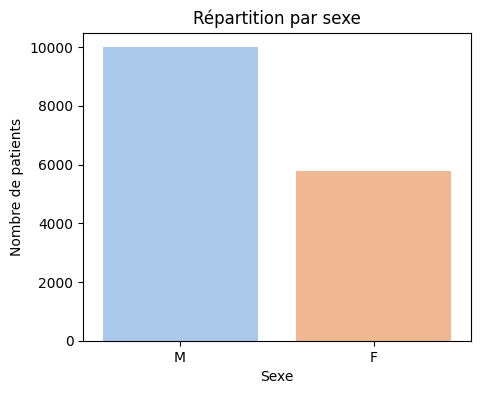

In [ ]:
# Répartition par sexe
print(BD['Sexe'].describe())
plt.figure(figsize=(5, 4))
sns.countplot(x='Sexe', data=BD, palette='pastel')
plt.title("Répartition par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")
plt.show()

count     15757
unique        2
top           U
freq      12077
Name: Zone, dtype: object


<ipython-input-17-3a8b22f7fbba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Zone', data=BD, palette='pastel')


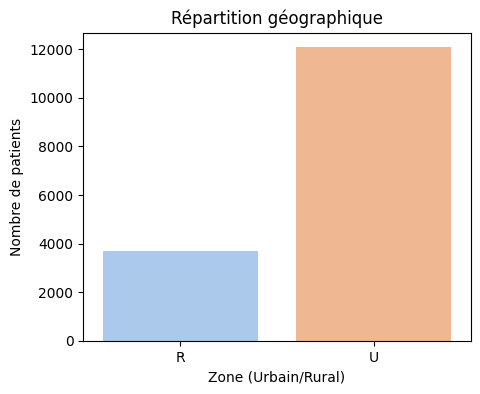

In [ ]:
# Répartition rurale/urbaine
print(BD['Zone'].describe())
plt.figure(figsize=(5, 4))
sns.countplot(x='Zone', data=BD, palette='pastel')
plt.title("Répartition géographique")
plt.xlabel("Zone (Urbain/Rural)")
plt.ylabel("Nombre de patients")
plt.show()

count    15757.000000
mean        61.426160
std         13.420862
min          4.000000
25%         54.000000
50%         62.000000
75%         70.000000
max        110.000000
Name: Age, dtype: float64


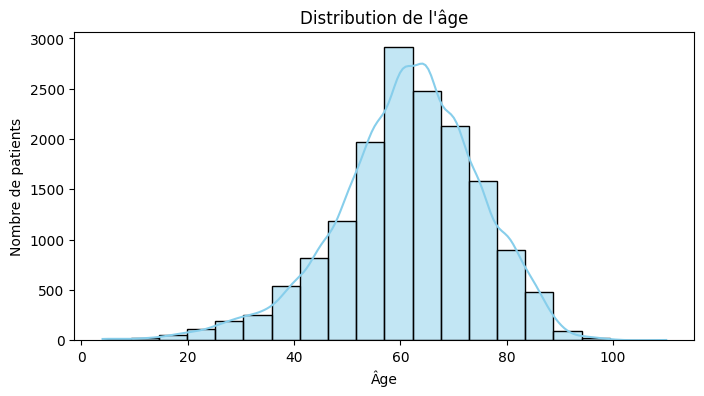

In [ ]:
# Distribution de l'âge
print(BD['Age'].describe())
plt.figure(figsize=(8, 4))
sns.histplot(BD['Age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

Durée moyenne de séjour : 6.42 jours
count    15757.000000
mean         6.415054
std          5.011421
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: Duree_totale, dtype: float64


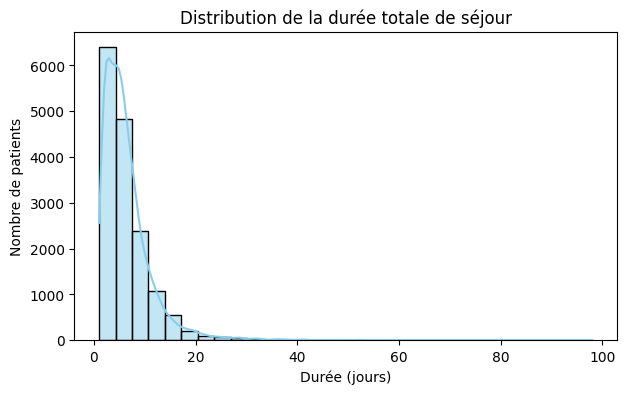

In [ ]:
# DUREE DE SEJOUR
moyenne_duree = BD['Duree_totale'].mean()
print(f"Durée moyenne de séjour : {moyenne_duree:.2f} jours")
duree = BD['Duree_totale'].describe()
print(duree)
plt.figure(figsize=(7, 4))
sns.histplot(BD['Duree_totale'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de la durée totale de séjour")
plt.xlabel("Durée (jours)")
plt.ylabel("Nombre de patients")
plt.show()


Répartition des types d'admission :
Type d’admission
Urgence                 10924
Consultation externe     4833
Name: count, dtype: int64

 Pourcentages :
Type d’admission
Urgence                 69.33 %
Consultation externe    30.67 %
Name: proportion, dtype: object


<ipython-input-20-c14350d5fb1f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type d’admission', data=BD, palette='pastel')


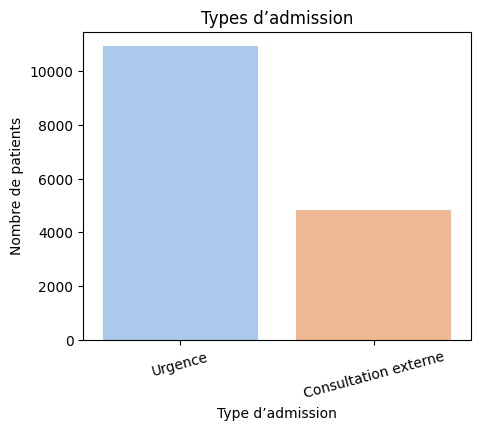

In [ ]:
#Répartition des types d’admission
admissions = BD['Type d’admission'].value_counts()
admissions_pct = BD['Type d’admission'].value_counts(normalize=True) * 100

print("Répartition des types d'admission :")
print(admissions)
print("\n Pourcentages :")
print(admissions_pct.round(2).astype(str) + " %")

# Visualisation
plt.figure(figsize=(5, 4))
sns.countplot(x='Type d’admission', data=BD, palette='pastel')
plt.title("Types d’admission")
plt.ylabel("Nombre de patients")
plt.xlabel("Type d’admission")
plt.xticks(rotation=15)
plt.show()


Répartition des issues :
Issue
Sortie                        13756
Décès                          1105
Sortie contre avis médical      896
Name: count, dtype: int64

 Pourcentages :
Issue
Sortie                        87.3 %
Décès                         7.01 %
Sortie contre avis médical    5.69 %
Name: proportion, dtype: object


<ipython-input-21-cc1f3db8d826>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Issue', data=BD, palette='Set2')


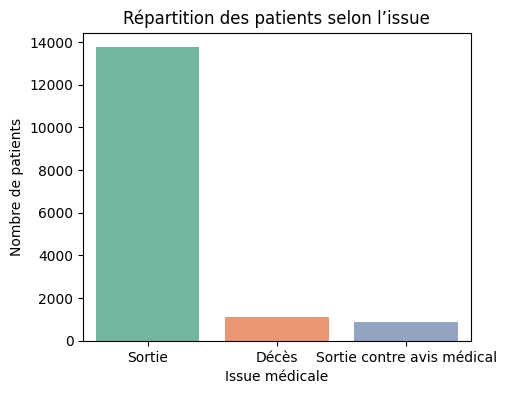

In [ ]:
#Répartition selon l’issue médicale

issue_counts = BD['Issue'].value_counts()
issue_pct = BD['Issue'].value_counts(normalize=True) * 100

print("Répartition des issues :")
print(issue_counts)
print("\n Pourcentages :")
print(issue_pct.round(2).astype(str) + " %")

# Visualisation
plt.figure(figsize=(5, 4))
sns.countplot(x='Issue', data=BD, palette='Set2')
plt.title("Répartition des patients selon l’issue")
plt.ylabel("Nombre de patients")
plt.xlabel("Issue médicale")
plt.show()


### **Interprétation**


Dans un premier temps, nous avons analysé les variables liées à l’identification des patients et à leur hospitalisation, afin de mieux appréhender la structure de notre échantillon, composé de 15 757 individus.

La distribution des âges suit une courbe gaussienne, centrée autour de 60 ans, indiquant une population majoritairement âgée, avec des patients âgés de 3 à 100 ans. Concernant la répartition selon le sexe, on observe une prédominance masculine, avec environ 10 000 hommes contre 6 000 femmes.

S’agissant de l’issue de l’hospitalisation, la majorité des patients ont été déclarés sortis vivants (plus de 13 000 cas), tandis que les décès ainsi que les sorties contre avis médical demeurent marginaux.

La répartition géographique révèle une concentration plus importante de patients provenant de zones urbaines.
Enfin, la durée moyenne d’hospitalisation est estimée à 6 jours, ce qui renseigne sur la sévérité moyenne des pathologies prises en charge dans l’échantillon.

### Variables de mode de vie et antécédents médicaux

,Variable,Oui (1),Non (0),% Oui,% Non
0,Tabagisme,793,14964,5,95
1,Alcool,1021,14736,6,94
2,Diabète,5097,10660,32,68
3,Hypertension,7656,8101,49,51
4,Cardiopathie ischémique,10551,5206,67,33
5,Cardiomyopathie préexistante,2434,13323,15,85
6,Maladie rénale chronique,1550,14207,10,90
7,Anemie sévère,305,15452,2,98
8,Anemie,2787,12970,18,82
9,Insuffisance rénale aiguë,3504,12253,22,78


<ipython-input-22-3076e72a8433>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resume, x='Variable', y='% Oui', palette='viridis')


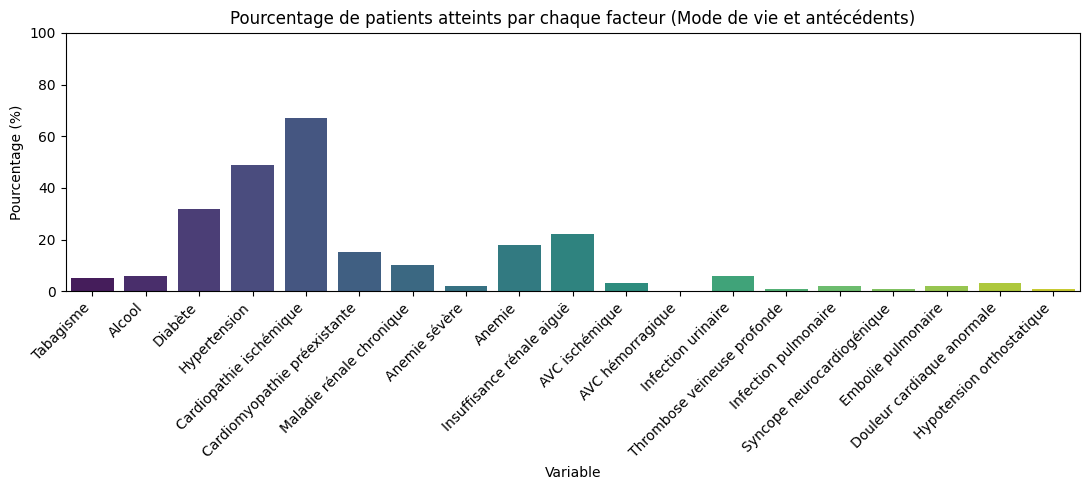

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Liste des variables mode de vie et antécédents médicaux déjà renommées
variables_mode_vie_antécédents_médicaux = [
    'Tabagisme', 'Alcool', 'Diabète', 'Hypertension',
    'Cardiopathie ischémique', 'Cardiomyopathie préexistante',
    'Maladie rénale chronique', 'Anemie sévère', 'Anemie',
    'Insuffisance rénale aiguë', 'AVC ischémique', 'AVC hémorragique',
    'Infection urinaire', 'Thrombose veineuse profonde', 'Infection pulmonaire',
    'Syncope neurocardiogénique', 'Embolie pulmonaire', 'Douleur cardiaque anormale',
    'Hypotension orthostatique'
]

# Création de la synthèse
resultats = []
for var in variables_mode_vie_antécédents_médicaux :
    if var in BD.columns:
        total = BD[var].value_counts()
        pct = BD[var].value_counts(normalize=True) * 100
        resultats.append({
            "Variable": var,
            "Oui (1)": int(total.get(1, 0)),
            "Non (0)": int(total.get(0, 0)),
            "% Oui": round(pct.get(1, 0)),
            "% Non": round(pct.get(0, 0))
        })

# Création du tableau récapitulatif
resume = pd.DataFrame(resultats)

# Affichage du tableau
display(resume)

# Visualisation
plt.figure(figsize=(11, 5))
sns.barplot(data=resume, x='Variable', y='% Oui', palette='viridis')
plt.title("Pourcentage de patients atteints par chaque facteur (Mode de vie et antécédents)")
plt.ylabel("Pourcentage (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


### **Interprétation**


Parmi les 17 variables étudiées relatives aux antécédents médicaux et au mode de vie, deux correspondent spécifiquement à des comportements à risque — la consommation d’alcool et le tabagisme — tandis que les quinze restantes concernent des antécédents médicaux déclarés.

Au sein de ces variables, les pathologies les plus fréquemment observées dans notre échantillon sont :

La cardiopathie ischémique, pathologie caractérisée par une mauvaise irrigation du cœur en raison d’un rétrécissement ou d’un blocage des artères coronaires.

L’hypertension artérielle, définie par une élévation chronique de la pression sanguine dans les artères.

Le diabète, maladie métabolique se traduisant par une mauvaise régulation du taux de glucose dans le sang.

Ces affections chroniques apparaissent donc comme particulièrement répandues au sein de la population hospitalisée analysée

## **Bilan - Partie 1**

L’analyse descriptive de notre échantillon de 15 757 patients met en évidence une population majoritairement âgée, avec une moyenne d’âge autour de 60 ans, une prédominance masculine, et une répartition géographique concentrée en zones urbaines. La majorité des hospitalisations se soldent par un retour à domicile, avec une durée moyenne de séjour de 6 jours.

Concernant les antécédents médicaux et le mode de vie, 17 variables ont été étudiées, dont deux liées à des comportements à risque (alcool et tabagisme). Les pathologies les plus répandues sont la cardiopathie ischémique, l’hypertension artérielle et le diabète, témoignant d’une forte présence de maladies chroniques dans l’échantillon.



## **PARTIE 2 : ANALYSE DES PATHOLOGIES CARDIAQUES**

Nous allons nous intéresser aux pathologies diagnostiquées chez les patients de notre échantillon. L’objectif de cette analyse est d’identifier les pathologies les plus graves ou à fort impact, afin de mettre en lumière d’éventuels facteurs de risque associés.

Pour sélectionner les trois pathologies que nous approfondirons dans la suite de notre étude, nous nous appuierons sur trois critères complémentaires :

- La fréquence d’apparition, qui permet d’évaluer l’ampleur de la pathologie au sein de la population étudiée

- Le nombre et le taux de mortalité associés, indicateurs directs de la gravité d'une pathologie

- L’effet cumulatif, c’est-à-dire la capacité d’une pathologie à coexister avec d’autres et à aggraver l’état global du patient.

Ces critères combinés nous permettront de cibler les pathologies les plus critiques.



### **Critère 1: Fréquence d’apparition des pathologies**



🔝 Top 5 des pathologies les plus fréquentes :
                  Pathologie  Effectif  Pourcentage      Prévalence
0  Syndrome coronarien aigu      5763    36.574221  Très fréquente
1    Insuffisance cardiaque      4561    28.945865  Très fréquente
2           IC à FE réduite      2421    15.364600  Très fréquente
3              Infarctus ST      2202    13.974741  Très fréquente
4         IC à FE préservée      2152    13.657422       Fréquente

🔻 Pathologies les plus rares :
                                       Pathologie  Effectif  Pourcentage  \
11                      Cardiopathie congénitale       165     1.047154   
12  Tachycardie supra-ventriculaire paroxystique       119     0.755220   
13                      Syndrome du sinus malade       107     0.679063   
14                       Endocardite infectieuse        29     0.184045   

   Prévalence  
11       Rare  
12       Rare  
13       Rare  
14       Rare  


<ipython-input-12-7fc756ccdb6b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Effectif", y="Pathologie", data=cardio_stats, palette="viridis")


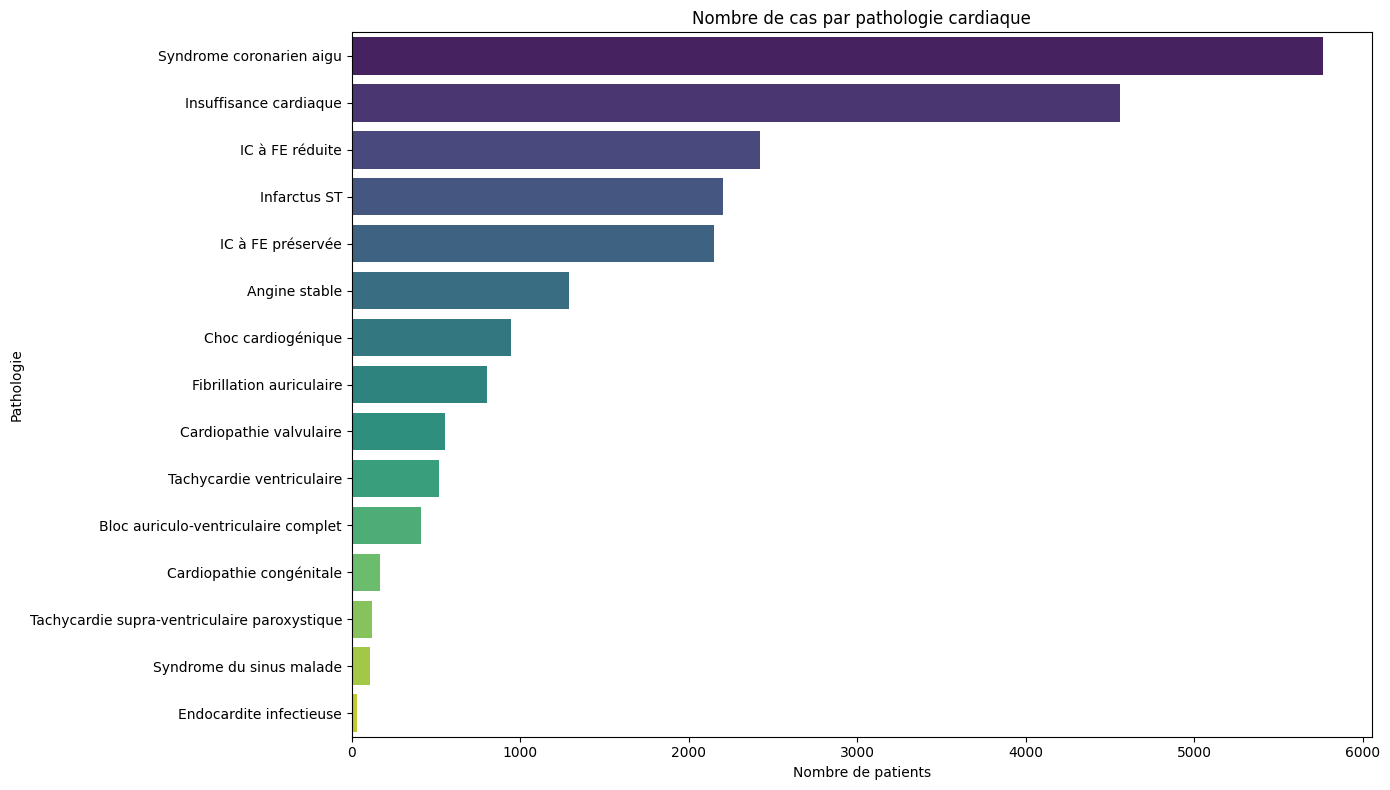

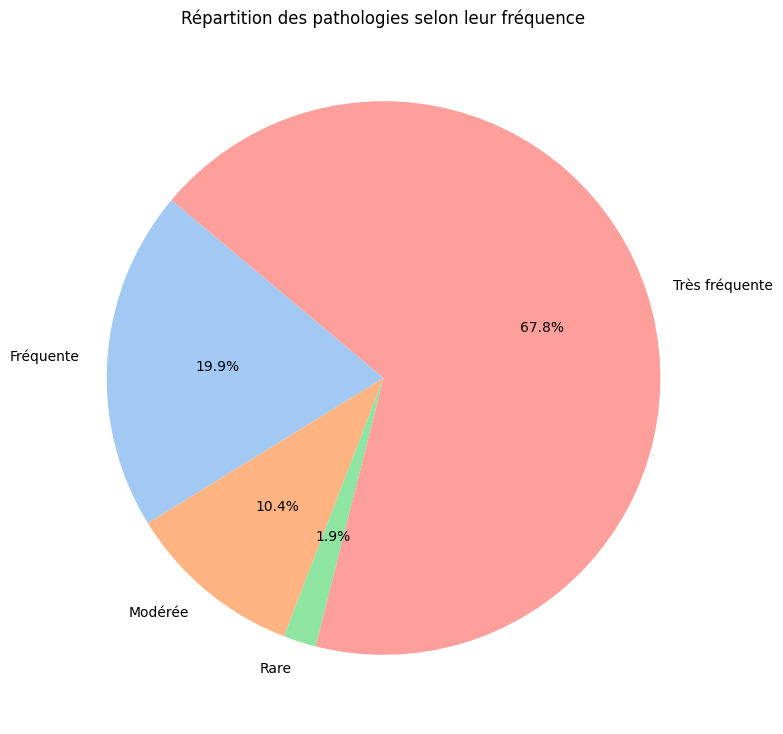

📋 Tableau des effectifs et pourcentages par pathologie (pourcent_patho) :


,Pathologie,Effectif,Pourcentage,Prévalence
0,Syndrome coronarien aigu,5763,36.574221,Très fréquente
1,Insuffisance cardiaque,4561,28.945865,Très fréquente
2,IC à FE réduite,2421,15.364600,Très fréquente
3,Infarctus ST,2202,13.974741,Très fréquente
4,IC à FE préservée,2152,13.657422,Fréquente
5,Angine stable,1289,8.180491,Fréquente
6,Choc cardiogénique,944,5.990988,Fréquente
7,Fibrillation auriculaire,800,5.077109,Modérée
8,Cardiopathie valvulaire,552,3.503205,Modérée
9,Tachycardie ventriculaire,519,3.293774,Modérée


In [ ]:
# Représentation des variables correspondant aux diagnostics cardio
colonnes_cardio = [
   'Angine stable',
   'Syndrome coronarien aigu',
   'Infarctus ST',
   'Insuffisance cardiaque',
   'IC à FE réduite',
   'IC à FE préservée',
   'Cardiopathie valvulaire',
   'Bloc auriculo-ventriculaire complet',
   'Syndrome du sinus malade',
   'Fibrillation auriculaire',
   'Tachycardie ventriculaire',
   'Tachycardie supra-ventriculaire paroxystique',
   'Cardiopathie congénitale',
   'Endocardite infectieuse',
   'Choc cardiogénique',
]

# Calcul des effectifs par pathologie uniquement pour les colonnes existantes
effectifs = BD[colonnes_cardio].sum()

# Création du DataFrame avec un nom explicite
cardio_stats = effectifs.reset_index()
cardio_stats.columns = ["Pathologie", "Effectif"]

# Calcul des pourcentages
total_patients = len(BD)
cardio_stats["Pourcentage"] = (cardio_stats["Effectif"] / total_patients) * 100

# Recalcul des groupes dynamiques selon les effectifs (et non plus le pourcentage)
quartiles = cardio_stats["Effectif"].quantile([0.25, 0.5, 0.75])
q1, q2, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]

# Nouvelle fonction de classification
def classify_effectif(effectif):
    if effectif > q3:
        return "Très fréquente"
    elif effectif > q2:
        return "Fréquente"
    elif effectif > q1:
        return "Modérée"
    else:
        return "Rare"

# Application de la nouvelle classification
cardio_stats["Prévalence"] = cardio_stats["Effectif"].apply(classify_effectif)

# Tri du DataFrame par effectif
cardio_stats = cardio_stats.sort_values(by="Effectif", ascending=False).reset_index(drop=True)

# Affichage des résultats
print("🔝 Top 5 des pathologies les plus fréquentes :\n", cardio_stats.head(5))
print("\n🔻 Pathologies les plus rares :\n", cardio_stats[cardio_stats['Prévalence'] == "Rare"])

# Visualisation - barplot
plt.figure(figsize=(14, 8))
sns.barplot(x="Effectif", y="Pathologie", data=cardio_stats, palette="viridis")
plt.title("Nombre de cas par pathologie cardiaque")
plt.xlabel("Nombre de patients")
plt.ylabel("Pathologie")
plt.tight_layout()
plt.show()

# Visualisation - camembert par groupe de fréquence
plt.figure(figsize=(8, 8))
df_grouped = cardio_stats.groupby("Prévalence")["Effectif"].sum()
df_grouped.plot.pie(autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Répartition des pathologies selon leur fréquence")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Création du tableau final avec un nom explicite
pourcent_patho = cardio_stats[["Pathologie", "Effectif", "Pourcentage", "Prévalence"]]
pourcent_patho = pourcent_patho.sort_values(by="Effectif", ascending=False).reset_index(drop=True)

# Affichage
print("📋 Tableau des effectifs et pourcentages par pathologie (pourcent_patho) :")
display(pourcent_patho)







### **Interprétation :**

 Pour comprendre la répartition des pathologies cardiovasculaires au sein de notre échantillon de patients, nous avons commencé par compter le nombre de cas observés pour chaque pathologie, puis nous avons calculé leur proportion par rapport à l’ensemble des patients.

Le premier graphique généré illustre le nombre de cas par pathologie et il met rapidement en évidence d'importantes disparités. Certaines pathologies sont largement dominantes, comme le syndrome coronarien aigu ou encore l’insuffisance cardiaque, alors que d’autres apparaissent bien plus rares, telles que l’endocardite infectieuse ou le syndrome du sinus malade.

Ce contraste évident a motivé la mise en place d’une classification des pathologies selon leur fréquence d’apparition.

Cette classification suit une méthode dynamique plutot que d’imposer des seuils fixes, nous avons choisi de nous appuyersur les  quartiles de la distribution des effectifs. Concrètement, cela signifie que les seuils de classification (rare, modérée, fréquente, très fréquente) sont calculés à partir des valeurs réelles observées dans les données:

- Les pathologiees en dessous du 1er quartile sont classées comme rares

- Celles comprises entre Q1 et la médiane sont dites modérées

- Celles entre Q2 et le 3e quartile sont considérées fréquentes

- Et enfin, celles au-dessus de Q3 sont très fréquentes

Sur cette base, un camembert a été construit pour visualiser la répartition globale des patients selon le groupe de prévalence auquel appartient leur pathologie. On y observe clairement que la majorité des cas est concentrée dans le groupe des pathologies très fréquentes, ce qui oriente notre intéret vers des pathologies telles que le syndrome coronarien aigu et l'insuffisance cardiaque.



### **Critère 2: Taux de mortalité**


📉 Taux de décès (%) par pathologie cardiovasculaire :
                                              Taux de décès (%)
Choc cardiogénique                                         47.6
Tachycardie ventriculaire                                  24.9
IC à FE réduite                                            20.8
Endocardite infectieuse                                    20.7
Fibrillation auriculaire                                   14.1
Insuffisance cardiaque                                     14.1
Bloc auriculo-ventriculaire complet                        12.6
Cardiopathie valvulaire                                    10.5
Infarctus ST                                                9.4
Syndrome coronarien aigu                                    9.1
IC à FE préservée                                           6.6
Syndrome du sinus malade                                    1.9
Cardiopathie congénitale                                    1.2
Tachycardie supra-ventriculaire paroxystique      

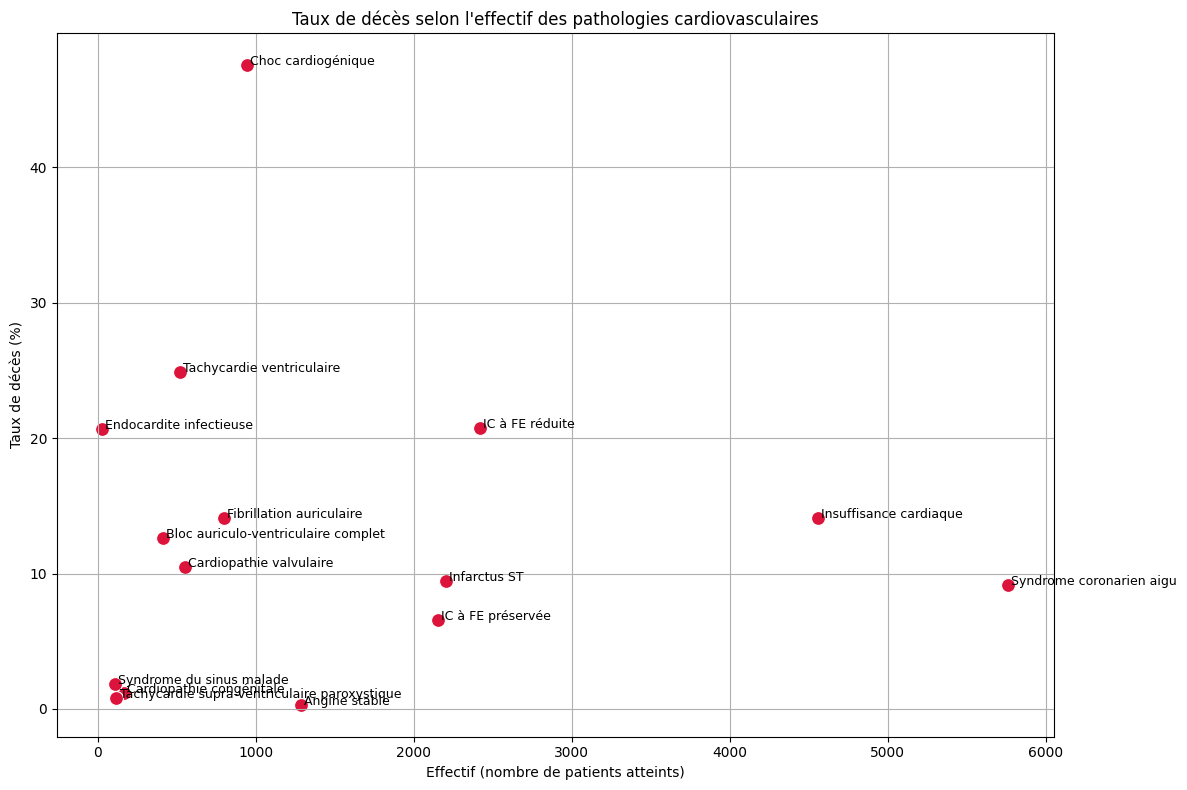

📌 Taux de mortalité global par groupe de prévalence :
Très fréquente : 9.87 %
Fréquente : 13.24 %
Modérée : 14.95 %
Rare : 2.66 %
Liste des pathologies restantes :
['Syndrome coronarien aigu', 'Infarctus ST', 'Insuffisance cardiaque', 'IC à FE réduite', 'IC à FE préservée', 'Cardiopathie valvulaire', 'Bloc auriculo-ventriculaire complet', 'Fibrillation auriculaire', 'Tachycardie ventriculaire', 'Endocardite infectieuse', 'Choc cardiogénique']


In [ ]:
taux_deces_patho = {}

for patho in colonnes_cardio:
    patients = BD[BD[patho] == 1]

    if len(patients) > 0:
        # Filtrer uniquement les patients dont l'issue est "Décès"
        decedes = patients[patients["Issue"] == "Décès"]

        # Calculer le pourcentage de décès
        pourcentage_deces = (len(decedes) / len(patients)) * 100
        taux_deces_patho[patho] = round(pourcentage_deces, 1)

# Transformer en DataFrame
df_taux_deces = pd.DataFrame.from_dict(taux_deces_patho, orient="index", columns=["Taux de décès (%)"])

# Trier par gravité (du plus élevé au plus bas)
df_taux_deces = df_taux_deces.sort_values(by="Taux de décès (%)", ascending=False)

# Affichage
print("📉 Taux de décès (%) par pathologie cardiovasculaire :")
print(df_taux_deces)

###

# Calcul du nombre de décès par pathologie
resultats_deces = {}

for patho in colonnes_cardio:
    patients = BD[BD[patho] == 1]

    # Vérifier s'il y a des patients atteints de la pathologie
    if len(patients) > 0:
        # Calculer la proportion de décès parmi les patients de chaque pathologie
        deces = patients['Issue'].value_counts(normalize=True).get("Décès", 0) * 100
        resultats_deces[patho] = deces

# Transformer en DataFrame
df_deces = pd.DataFrame(resultats_deces, index=["Taux de décès (%)"]).T

# Ajouter l'effectif pour chaque pathologie
df_deces["Effectif"] = [BD[patho].sum() for patho in df_deces.index]

# Trier par effectif (de plus grand à plus petit) et taux de décès (de plus grand à plus petit)
df_deces_sorted = df_deces.sort_values(by=["Effectif", "Taux de décès (%)"], ascending=[False, False])

# Affichage
print("📊 Taux de décès et effectif par pathologie cardiovasculaire triés :")
print(df_deces_sorted)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_deces_sorted,
    x="Effectif",
    y="Taux de décès (%)",
    color="crimson",
    s=100
)

# Ajouter les annotations des noms de pathologies
for i in range(len(df_deces_sorted)):
    plt.text(
        df_deces_sorted["Effectif"].iloc[i] + 20,
        df_deces_sorted["Taux de décès (%)"].iloc[i],
        df_deces_sorted.index[i],
        fontsize=9
    )

plt.title("Taux de décès selon l'effectif des pathologies cardiovasculaires")
plt.xlabel("Effectif (nombre de patients atteints)")
plt.ylabel("Taux de décès (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ajouter la colonne 'Prévalence' à df_deces_sorted en utilisant l'index (Pathologie)
df_deces_sorted = df_deces_sorted.merge(
    cardio_stats[["Pathologie", "Prévalence"]],
    left_index=True,
    right_on="Pathologie",
    how="left"
).set_index("Pathologie")

### Taux de mortalité par prevalence
 # Dictionnaire pour stocker les taux de mortalité globaux par groupe de prévalence
taux_mortalite_par_prevalence = {}

# On récupère les groupes de prévalence existants
groupes_prevalence = df_deces_sorted["Prévalence"].unique()

for groupe in groupes_prevalence:
    # Liste des pathologies appartenant à ce groupe
    pathos_groupe = df_deces_sorted[df_deces_sorted["Prévalence"] == groupe].index.tolist()

    # Récupérer tous les patients atteints d'au moins une pathologie du groupe
    patients_groupe = BD[BD[pathos_groupe].sum(axis=1) >= 1]

    # Nombre total de patients avec une pathologie de ce groupe
    total_patients = len(patients_groupe)

    # Nombre de décès parmi ces patients
    total_deces = (patients_groupe["Issue"] == "Décès").sum()

    # Calcul du taux de mortalité global
    taux = (total_deces / total_patients) * 100 if total_patients > 0 else 0
    taux_mortalite_par_prevalence[groupe] = round(taux, 2)

# Affichage final
print("📌 Taux de mortalité global par groupe de prévalence :")
for groupe, taux in taux_mortalite_par_prevalence.items():
    print(f"{groupe} : {taux} %")

 # Liste des pathologies à supprimer
pathologies_a_supprimer = [
    "Syndrome du sinus malade",
    "Angine stable",
    "Cardiopathie congénitale",
    "Tachycardie supra-ventriculaire paroxystique"
]

# Filtrer les colonnes_cardio pour exclure les pathologies spécifiées
colonnes_cardio_filtered = [patho for patho in colonnes_cardio if patho not in pathologies_a_supprimer]

# Vérification de la nouvelle liste de pathologies après suppression
print("Liste des pathologies restantes :")
print(colonnes_cardio_filtered)



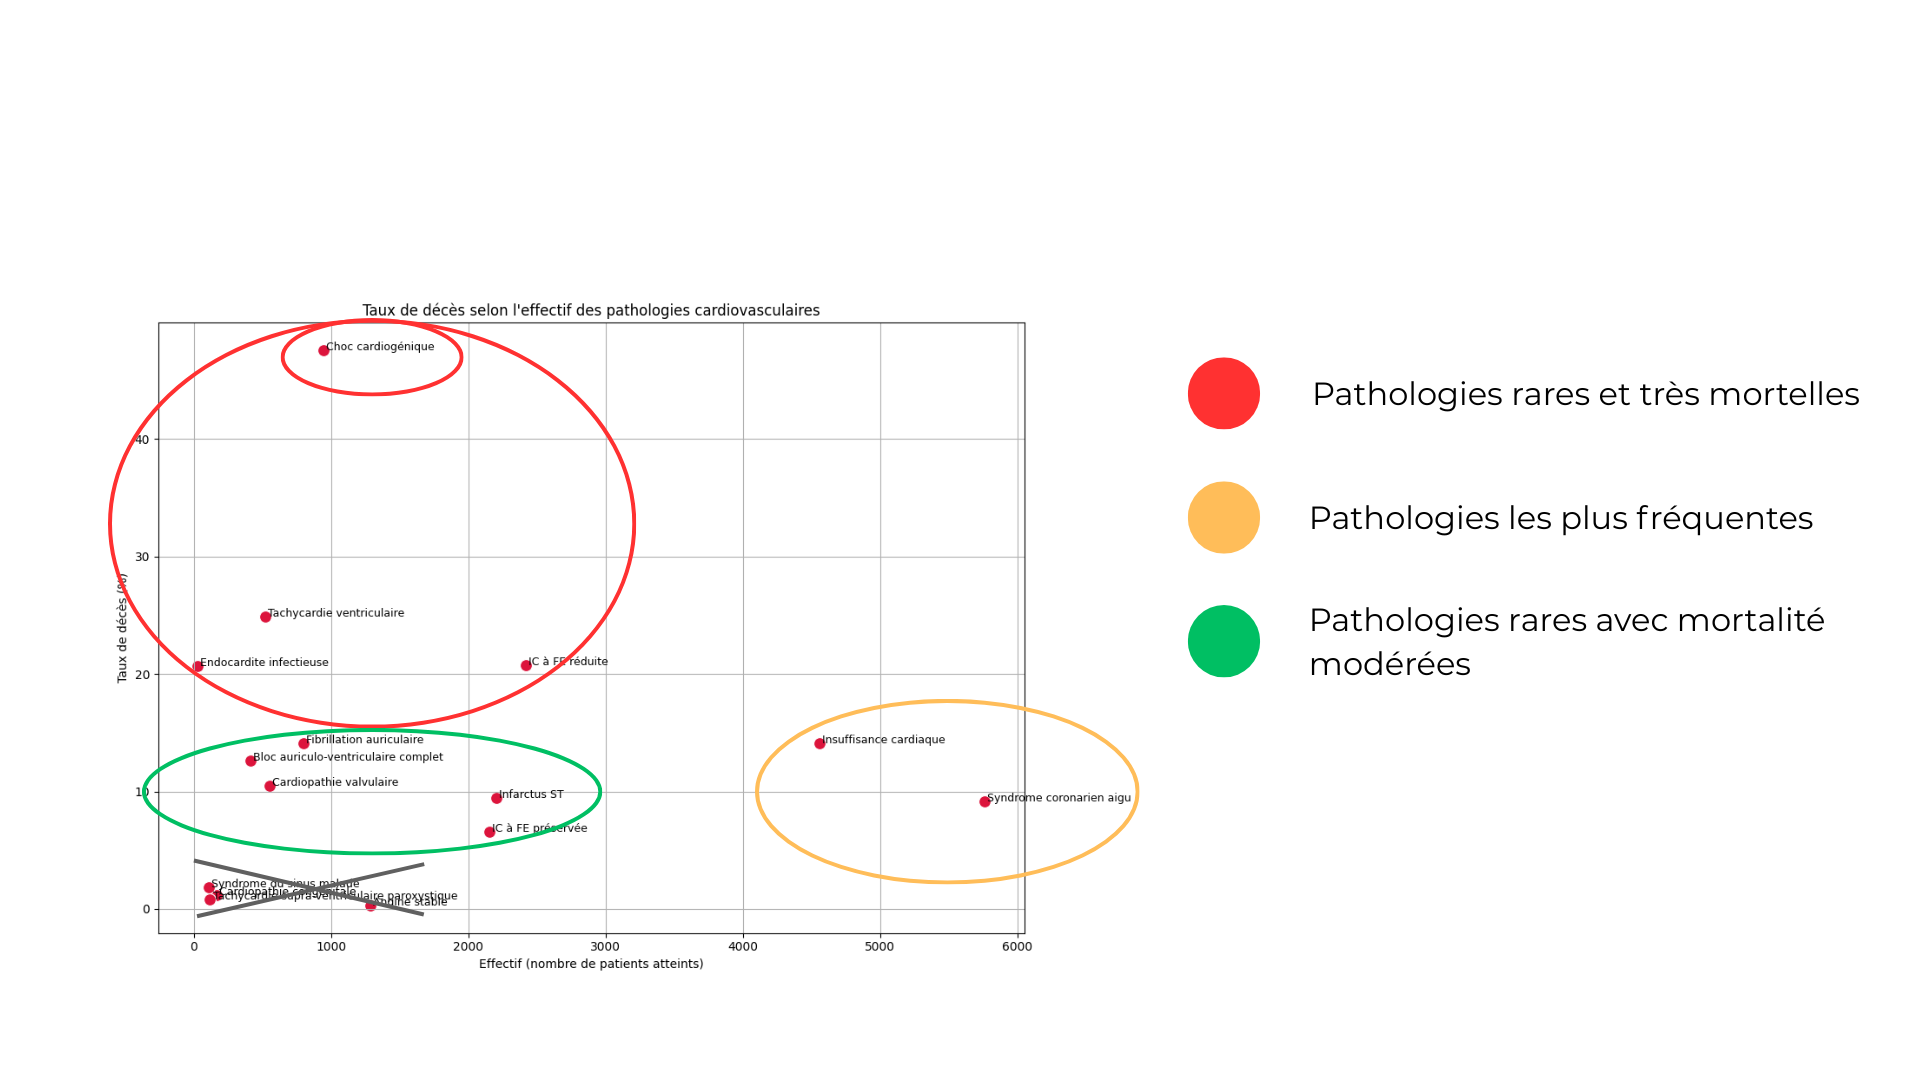

### **Interprétation**

Pour étudier la mortalité associée à chaque pathologie, nous avons construit un tableau comparatif croisant l’effectif (nombre de cas) et le taux de mortalité. Cette approche met en évidence des situations contrastées : certaines pathologies présentent un nombre de décès élevé malgré un taux de mortalité relativement modéré, tandis que d’autres, moins fréquentes, affichent des taux de mortalité bien plus élevés malgré un faible effectif.

Le nuage de points ci-dessous permet d’illustrer cette observation. Sur la partie droite du graphique, correspondant aux pathologies les plus fréquentes, les taux de mortalité sont globalement modérés et relativement stables. En revanche, à mesure que l’on se dirige vers la gauche où se trouvent les pathologies les plus rares les taux de mortalité deviennent plus variables et imprévisibles.

Cette instabilité peut témoigner d’une prise en charge plus difficile, d’un manque de protocoles bien établis ou encore d’une complexité clinique accrue pour ces maladies moins courantes.


De plus, certaines maladies rares sont peu sévères, et leur inclusion dans le groupe des pathologies « rares » a pour effet de diluer le taux de mortalité moyen. Or, si notre objectif est d’identifier les maladies potentiellement dangereuses, et que nous fixons un seuil de mortalité au-delà duquel une pathologie est jugée préoccupante, alors il devient peu pertinent de considérer celles qui présentent à la fois un faible taux de mortalité et une faible prévalence dans notre échantillon.

À l’inverse, cette représentation met en lumière une pathologie particulièrement pertinente à approfondir. Le choc cardiogénique affiche le taux de mortalité le plus élevé de notre échantillon, atteignant environ 47 %




### **Critère 3: Effet cumulatif**
Enfin, en dernier critère nous analyserons l’effet cumulatif. Par cela, nous entendons les situations où les patients sont simultanément exposés à plusieurs pathologies. L’objectif est de déterminer si cette co-occurrence constitue un facteur de risque significatif dans notre échantillon. Si tel est le cas, nous chercherons à identifier les pathologies cardiaques les plus susceptibles de favoriser l’apparition d’autres affections.


0    4704
1    4320
2    3809
3    1901
4     762
5     222
6      37
7       2
Name: count, dtype: int64


<ipython-input-25-bc0fd6ddb5fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values, palette="mako")


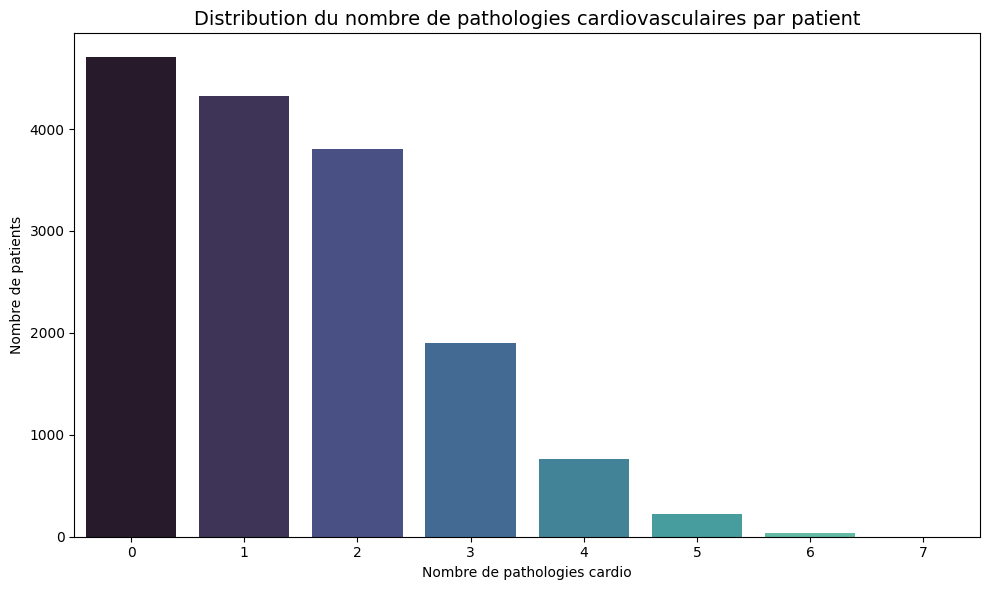

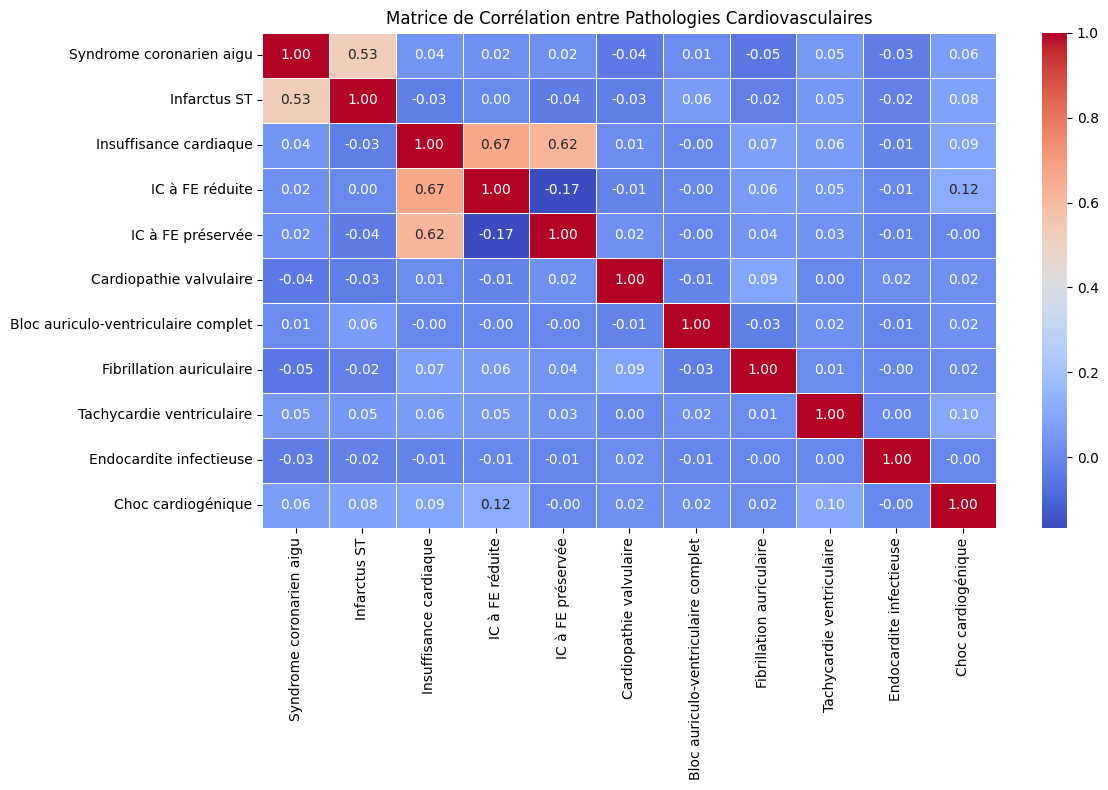

In [ ]:
#Nombre de pathologie cardio possible par patient
nb_patho = BD[colonnes_cardio].sum(axis=1)
distribution = nb_patho.value_counts().sort_index()
print(distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=distribution.index, y=distribution.values, palette="mako")

plt.title("Distribution du nombre de pathologies cardiovasculaires par patient", fontsize=14)
plt.xlabel("Nombre de pathologies cardio")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### corrélation des pathologies entre elles

# Créer un DataFrame avec les pathologies restantes
df_pathos = BD[colonnes_cardio_filtered]

# Calculer la corrélation entre les pathologies (corrélation de Pearson sur les variables binaires)
correlation_matrix = df_pathos.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation entre Pathologies Cardiovasculaires")
plt.tight_layout()
plt.show()


In [ ]:
# 1. Calcul du nombre de pathologies accumulées par patient
BD['nb_patho'] = BD[colonnes_cardio].sum(axis=1)

# 2. Calcul du taux de mortalité pour chaque nombre de pathologies accumulées
taux_deces_accumules = {}

for nb in range(0, BD['nb_patho'].max() + 1):
    # Filtrer les patients ayant ce nombre de pathologies
    patients_accumules = BD[BD['nb_patho'] == nb]

    # Calculer le taux de mortalité pour ces patients
    if len(patients_accumules) > 0:
        taux_deces = (patients_accumules['Issue'] == 'Décès').sum() / len(patients_accumules) * 100
        taux_deces_accumules[nb] = round(taux_deces, 1)

# Transformer en DataFrame pour une meilleure visualisation
df_taux_deces_accumules = pd.DataFrame.from_dict(taux_deces_accumules, orient="index", columns=["Taux de décès (%)"])

# 3. Visualisation du taux de mortalité par nombre de pathologies accumulées
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_taux_deces_accumules.index, y=df_taux_deces_accumules["Taux de décès (%)"], marker='o', color='crimson')
plt.title("Taux de mortalité par nombre de pathologies accumulées", fontsize=14)
plt.xlabel("Nombre de pathologies accumulées")
plt.ylabel("Taux de mortalité (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'BD' is not defined

### **Interpretation**

Cette analyse débute par une représentation graphique répartissant les patients selon le nombre de pathologies cardiaques diagnostiquées. On y observe que (bien que minoritaires) certains patients cumulent jusqu’à sept pathologies. De manière générale, parmi les patients atteints d’au moins une pathologie cardiaque, la majorité en présente une à deux.

Nous nous intéressons ensuite à l’impact de cet effet cumulatif sur le taux de mortalité. Le graphique associé met en évidence une pente fortement croissante, qui s’accélère rapidement. Qu'est ce que cela signifie ? Plus un patient cumule de pathologies cardiaques, plus son risque de mortalité augmente. La courbe suit une trajectoire presque exponentielle : le risque ne progresse pas de manière linéaire, mais semble s’aggraver à mesure que les pathologies s’accumulent.

On remarque cependant une chute soudaine de cette courbe au-delà de six pathologies. Ce phénomène s’explique probablement par le faible nombre de patients concernés dans cette catégorie, ainsi que par une mortalité si élevée qu'elle limite la possibilité d'observer davantage de cas cumulés.

Maintenant que l’effet cumulatif est établi comme un facteur de risque important, nous cherchons à identifier les pathologies les plus susceptibles d’en favoriser d’autres. Le tableau de corrélation ci-dessus nous aide à visualiser ces interactions. Il révèle notamment que l’insuffisance cardiaque est fortement corrélée à l’IC à FE réduite et l’IC à FE préservée , ce qui attirera particulièrement notre attention. On note également une corrélation significative entre le syndrome coronarien aigu et l’infarctus ST.

Ces observations confirment les tendances relevées précédemment : la plupart des patients sont atteints d’une ou deux pathologies majeures, souvent interconnectées, et ce sont justement ces combinaisons qu’il convient d’examiner en priorité.



## **Bilan - Partie 2**

Sur la base des critères analysés, nous sommes désormais en mesure de sélectionner les pathologies cardiaques les plus pertinentes pour approfondir notre analyse :

- **Le choc cardiogénique** ,

bien qu’il s’agisse d’une pathologie rare, se distingue par un taux de mortalité nettement supérieur à celui des autres affections cardiaques. Ce seul indicateur justifie à lui seul une attention particulière.

- **Le syndrome coronarien aigu** et **l’insuffisance cardiaque**,

ces deux pathologies figurent parmi les plus fréquemment diagnostiquées dans notre échantillon. Leur taux de mortalité, bien que relativement maîtrisé, demeure préoccupant compte tenu du nombre très élevé de cas recensés. De plus, elles présentent des corrélations marquées avec d'autres pathologies, ce qui suggère un rôle potentiel dans le développement ou l’aggravation de maladies associées.

Ces trois pathologies seront donc retenues comme axes prioritaires d’étude pour la suite de notre analyse, notamment dans l’exploration des facteurs de risque.


## **PARTIE 3: IDENTIFICATION DES FACTEURS DE RISQUE**





Dans cette section, nous allons étudier les facteurs de risque associés aux trois pathologies que nous avons sélectionnées. L’objectif est d’identifier les prédispositions des individus face à ces maladies, à travers l’analyse de plusieurs facteurs: leurs antécédents médicaux, leur mode de vie, ainsi que des caractéristiques plus spécifiques telles que l’âge, le sexe ou encore leur zone de résidence.

### **3.1 Facteurs de risque: Antécédents médicaux**

In [ ]:
# Liste des antécédents médicaux fournie
antecedents_list = [
    'Diabète',
    'Hypertension',
    'Cardiopathie ischémique',
    'Cardiomyopathie préexistante',
    'Maladie rénale chronique',
    'Anemie sévère',
    'Anemie',
    'Insuffisance rénale aiguë',
    'AVC ischémique',
    'AVC hémorragique',
    'Infection urinaire',
    'Thrombose veineuse profonde',
    'Infection pulmonaire',
    'Syncope neurocardiogénique',
    'Embolie pulmonaire',
    'Douleur cardiaque anormale',
    'Hypotension orthostatique'
]

# 1. Filtrer les patients ayant l'une des 3 pathologies
patients_top3 = BD[
    (BD['Choc cardiogénique'] == 1) |
    (BD['Syndrome coronarien aigu'] == 1) |
    (BD['Insuffisance cardiaque'] == 1)
]

# 2. Filtrer les colonnes correspondantes aux antécédents médicaux donnés
colonnes_antecedents = antecedents_list

# 3. Vérifier et remplacer les NaN par 0 dans les colonnes des antécédents
patients_top3[colonnes_antecedents] = patients_top3[colonnes_antecedents].fillna(0)

# 4. Création d'un dictionnaire pour compter les antécédents par pathologie cardiovasculaire
antecedents_par_patho = {
    'Choc cardiogénique': {},
    'Syndrome coronarien aigu': {},
    'Insuffisance cardiaque': {}
}

# 5. Comptage des antécédents pour chaque pathologie
for patho in ['Choc cardiogénique', 'Syndrome coronarien aigu', 'Insuffisance cardiaque']:
    # Filtrer les patients ayant la pathologie en question
    patients_pour_patho = patients_top3[patients_top3[patho] == 1]

    # Comptage des antécédents pour ces patients
    antecedents_pour_patho = patients_pour_patho[colonnes_antecedents].sum().sort_values(ascending=False)

    # Stocker les résultats dans le dictionnaire
    antecedents_par_patho[patho] = antecedents_pour_patho

# 6. Affichage des antécédents les plus fréquents par pathologie
for patho, antecedents_frequents in antecedents_par_patho.items():
    print(f"Antécédents les plus fréquents pour {patho}:")
    print(antecedents_frequents.head(10))
    print("\n")

    # 5. Comptage des antécédents pour chaque pathologie et calcul des pourcentages
for patho in ['Choc cardiogénique', 'Syndrome coronarien aigu', 'Insuffisance cardiaque']:
    # Filtrer les patients ayant la pathologie en question
    patients_pour_patho = patients_top3[patients_top3[patho] == 1]

    # Nombre total de patients pour la pathologie
    total_patients = len(patients_pour_patho)

    # Comptage des antécédents pour ces patients
    antecedents_pour_patho = patients_pour_patho[colonnes_antecedents].sum()

    # Calcul du pourcentage d'occurrence de chaque antécédent parmi les patients ayant la pathologie
    antecedents_pour_patho_percentages = (antecedents_pour_patho / total_patients) * 100

    # Stocker les résultats dans le dictionnaire (antécédents et pourcentages)
    antecedents_par_patho[patho] = pd.DataFrame({
        'Nombre': antecedents_pour_patho,
        'Pourcentage': antecedents_pour_patho_percentages
    }).sort_values(by='Pourcentage', ascending=False)

# 6. Affichage des antécédents les plus fréquents et de leurs pourcentages par pathologie
for patho, antecedents_frequents in antecedents_par_patho.items():
    print(f"Antécédents les plus fréquents pour {patho}:")
    print(antecedents_frequents.head(10))
    print("\n")

Antécédents les plus fréquents pour Choc cardiogénique:
Cardiopathie ischémique         494
Insuffisance rénale aiguë       412
Hypertension                    407
Diabète                         295
Cardiomyopathie préexistante    280
Anemie                          247
Maladie rénale chronique        179
Infection urinaire               47
Infection pulmonaire             39
AVC ischémique                   26
dtype: int64


Antécédents les plus fréquents pour Syndrome coronarien aigu:
Cardiopathie ischémique         4548
Hypertension                    2782
Diabète                         1821
Insuffisance rénale aiguë       1204
Anemie                           918
Cardiomyopathie préexistante     777
Maladie rénale chronique         431
Infection urinaire               276
AVC ischémique                    97
Anemie sévère                     92
dtype: int64


Antécédents les plus fréquents pour Insuffisance cardiaque:
Cardiopathie ischémique         3001
Hypertension             

<ipython-input-27-cb07a6b16ad3>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_top3[colonnes_antecedents] = patients_top3[colonnes_antecedents].fillna(0)


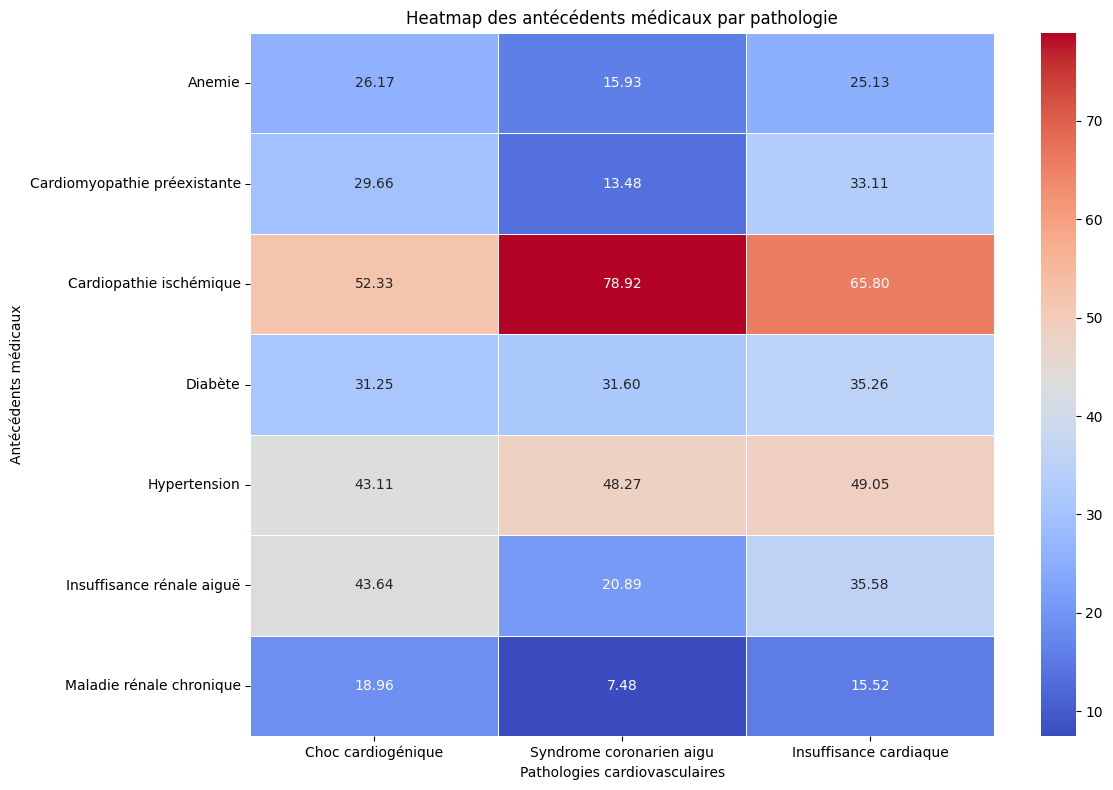

In [ ]:

# Créer une DataFrame avec les pourcentages pour chaque pathologie et antécédent
heatmap_data = {}

# Construction du dictionnaire avec les pourcentages
for patho in ['Choc cardiogénique', 'Syndrome coronarien aigu', 'Insuffisance cardiaque']:
    heatmap_data[patho] = antecedents_par_patho[patho]['Pourcentage']

# Transformation en DataFrame
heatmap_df = pd.DataFrame(heatmap_data)

# Supprimer les antécédents dont tous les pourcentages sont < ...%
heatmap_df = heatmap_df[heatmap_df.max(axis=1) >= 7]

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap des antécédents médicaux par pathologie")
plt.xlabel("Pathologies cardiovasculaires")
plt.ylabel("Antécédents médicaux")
plt.tight_layout()
plt.show()

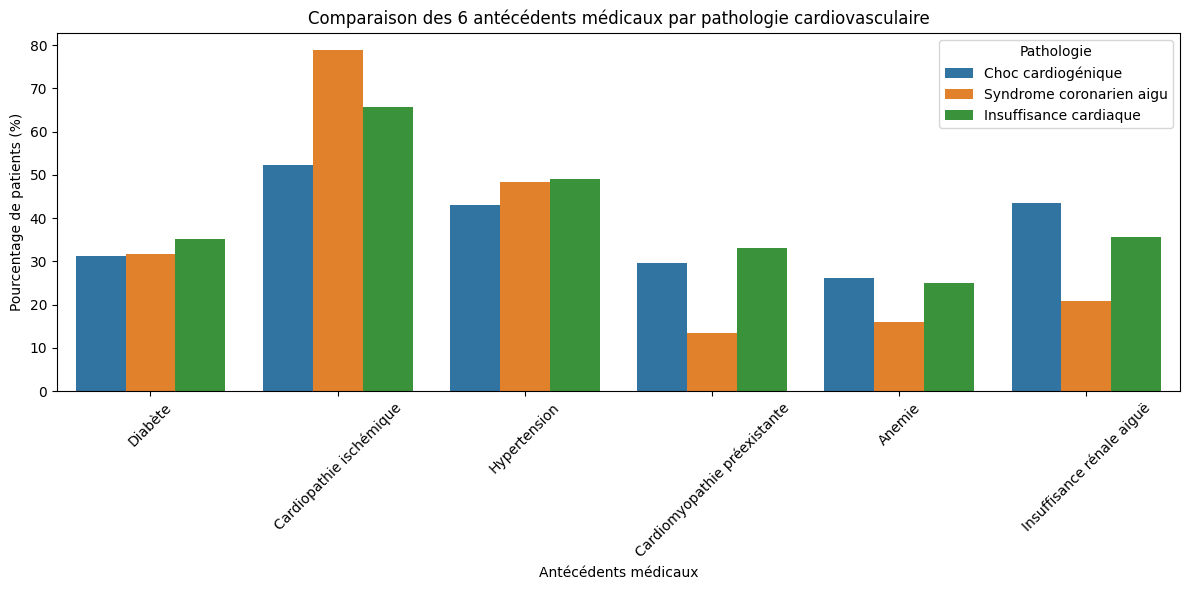

In [ ]:
# Données simplifiées avec 6 antécédents sélectionnés
antecedents = ['Diabète', 'Cardiopathie ischémique', 'Hypertension',
               'Cardiomyopathie préexistante', 'Anemie', 'Insuffisance rénale aiguë']

# Construction du DataFrame
data = {
    'Antécédent': antecedents * 3,
    'Pathologie': ['Choc cardiogénique']*6 + ['Syndrome coronarien aigu']*6 + ['Insuffisance cardiaque']*6,
    'Pourcentage': [
        31.2, 52.3, 43.1, 29.7, 26.2, 43.6,   # Choc cardiogénique
        31.6, 78.9, 48.3, 13.5, 15.9, 20.9,   # SCA
        35.2, 65.8, 49.0, 33.1, 25.1, 35.6    # IC
    ]
}

df = pd.DataFrame(data)

# Graphique en barres groupées
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Antécédent', y='Pourcentage', hue='Pathologie')

plt.title("Comparaison des 6 antécédents médicaux par pathologie cardiovasculaire")
plt.ylabel("Pourcentage de patients (%)")
plt.xlabel("Antécédents médicaux")
plt.xticks(rotation=45)
plt.legend(title="Pathologie")
plt.tight_layout()
plt.show()

### **Interprétation**

Pour étudier les antécédents médicaux, notre premier réflexe a été de compter, pour chaque pathologie ciblée, le nombre de cas présentant un antécédent donné. L’objectif est de repérer d’éventuels contrastes.

Le tableau ci-dessus illustre cette démarche. Il a été préalablement filtré pour ne conserver que les antécédents les plus fréquemment associés aux pathologies que nous analysons. On y observe que certaines affections comme l’insuffisance rénale, l’hypertension, le diabète, la cardiopathie ischémique, la cardiomyopathie préexistante et l’anémie sont nettement plus fréquentes chez les patients souffrant d’au moins une des trois pathologies cardiaques retenues.

Le graphique à barres présenté ci-dessus permet quant à lui de visualiser plus clairement la répartition de ces antécédents médicaux selon chaque pathologie.

L’analyse des antécédents médicaux met en évidence plusieurs facteurs de risque fortement associés aux pathologies cardiaques étudiées. L’hypertension, l’insuffisance rénale (aiguë ou chronique) et la cardiopathie ischémique apparaissent comme des affections particulièrement récurrentes chez les patients concernés. Ces résultats confirment leur rôle probable dans le développement ou l’aggravation de ces maladies cardiovasculaires.




### **3.2 Facteurs de risque: Caractéristiques de l'individu et Mode de vie**




<ipython-input-31-b5443b81bcf2>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes = BD.groupby('Tranche âge')[maladie].mean().reset_index()
<ipython-input-31-b5443b81bcf2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupes, x='Tranche âge', y=maladie, palette='viridis')


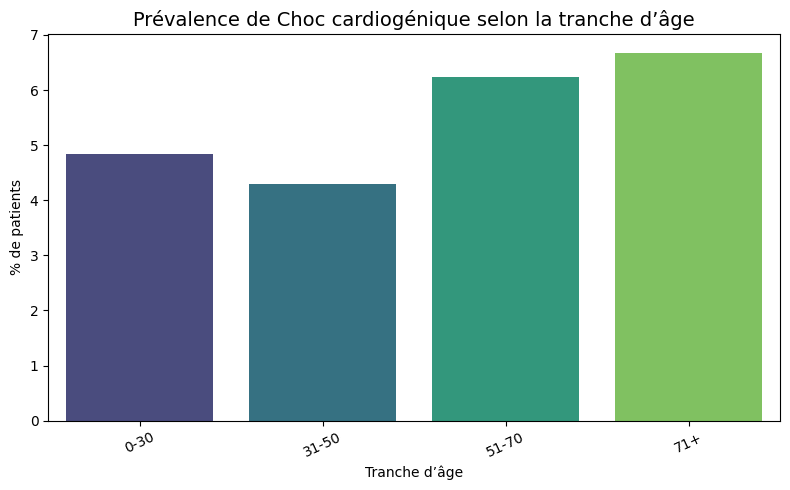

<ipython-input-31-b5443b81bcf2>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes = BD.groupby('Tranche âge')[maladie].mean().reset_index()
<ipython-input-31-b5443b81bcf2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupes, x='Tranche âge', y=maladie, palette='viridis')


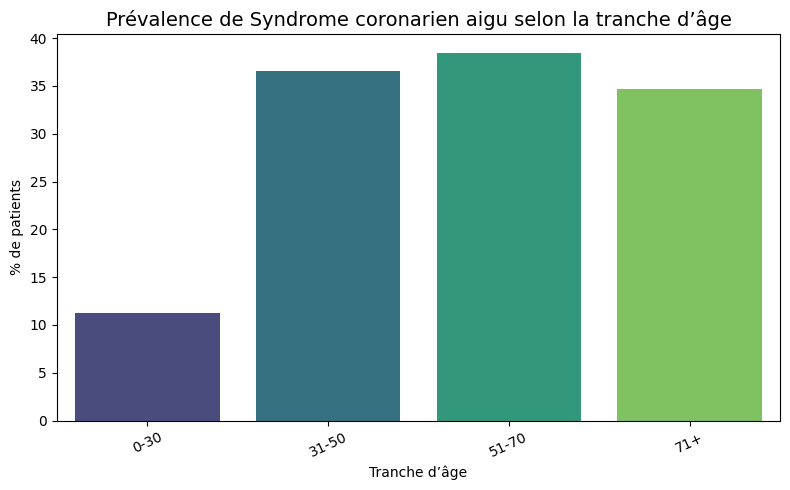

<ipython-input-31-b5443b81bcf2>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes = BD.groupby('Tranche âge')[maladie].mean().reset_index()
<ipython-input-31-b5443b81bcf2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupes, x='Tranche âge', y=maladie, palette='viridis')


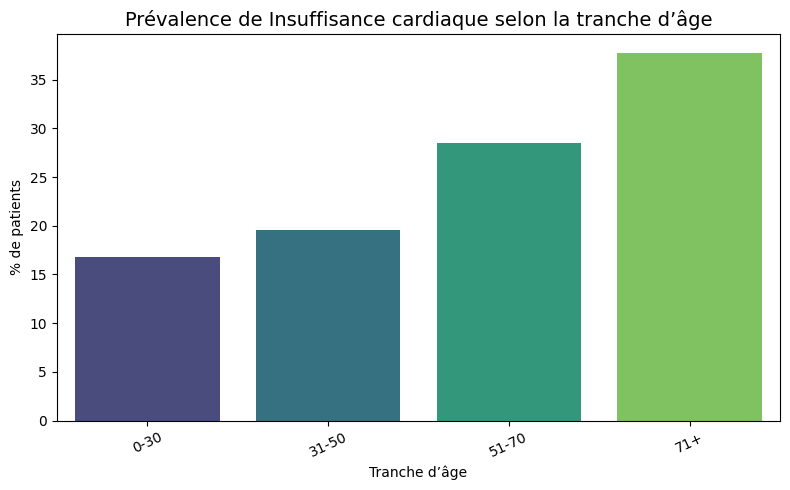

In [ ]:

# Les 3 maladies choisies
top3_maladies = ['Choc cardiogénique', 'Syndrome coronarien aigu', 'Insuffisance cardiaque']

# Créer les tranches d’âge
BD['Tranche âge'] = pd.cut(BD['Age'], bins=[0, 30, 50, 70, 120],
                           labels=['0-30', '31-50', '51-70', '71+'])

# S'assurer que la variable Sexe est bien formatée (au cas où utilisée plus tard)
BD['Sexe'] = BD['Sexe'].str.strip().str.upper().replace({'M': 'Homme', 'F': 'Femme'})

# Un graphe par maladie selon la tranche d’âge
for maladie in top3_maladies:
    # Calcul des moyennes par tranche d’âge
    groupes = BD.groupby('Tranche âge')[maladie].mean().reset_index()
    groupes[maladie] = groupes[maladie] * 100  # en pourcentage

    # Tracer le graphique
    plt.figure(figsize=(8, 5))
    sns.barplot(data=groupes, x='Tranche âge', y=maladie, palette='viridis')
    plt.title(f"Prévalence de {maladie} selon la tranche d’âge", fontsize=14)
    plt.xlabel("Tranche d’âge")
    plt.ylabel("% de patients")
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.show()


### **Interprétation**

Dans cette sous-partie, nous analysons l’influence de l’âge — l’une des principales variables sociodémographiques — sur la prévalence des pathologies cardiaques dans notre échantillon. Le choix de cette variable s’appuie sur le fait que l’âge constitue un facteur de risque majeur dans le développement des maladies cardiovasculaires. L’objectif est de vérifier si cette tendance se confirme dans notre population étudiée pour trois pathologies spécifiques : le choc cardiogénique, l’insuffisance cardiaque et le syndrome coronarien.

Concernant **le choc cardiogénique**, les résultats révèlent une augmentation de sa fréquence avec l’âge. Toutefois, il reste significativement présent dans toutes les tranches d’âge. Cela s’explique d’un point de vue médical : cette affection correspond à une défaillance aiguë et sévère du cœur, souvent provoquée par un infarctus massif ou une insuffisance cardiaque avancée. Bien que les personnes âgées y soient davantage exposées, cette pathologie peut survenir à tout âge, ce qui justifie sa présence dans l’ensemble des groupes d’âge.

S’agissant de **l’insuffisance cardiaque**, on observe une progression marquée avec l’âge, notamment à partir de 51 ans, avec un pic chez les individus de plus de 70 ans. Cette évolution met en évidence une corrélation claire entre le vieillissement et l’apparition de cette pathologie. D’un point de vue clinique, l’insuffisance cardiaque n’apparaît pas de manière brutale : elle résulte généralement d’un affaiblissement progressif du muscle cardiaque, souvent causé par d’autres affections chroniques telles que l’hypertension artérielle, ce qui rejoint les conclusions établies par Lorie.

Enfin, **le syndrome coronarien** émerge dès la tranche d’âge 31-50 ans, avec un pic entre 51 et 70 ans. Ce constat s'explique par l’accumulation, dès l’âge de 30 ans, de facteurs de risque liés au mode de vie (tabagisme, alimentation déséquilibrée, stress, sédentarité, etc.). Ces comportements délétères ont des effets cumulatifs sur les artères, dont les dommages peuvent commencer à se manifester relativement tôt.



## **Bilan - Partie 3**

Cette partie identifie les facteurs de risque associés aux pathologies cardiaques étudiées en analysant les antécédents médicaux, le mode de vie, ainsi que les caractéristiques sociodémographiques. L'hypertension, l'insuffisance rénale et la cardiopathie ischémique apparaissent comme des facteurs de risque majeurs, fréquemment associés aux patients souffrant de maladies cardiaques. L'âge est également un facteur clé : le choc cardiogénique, bien qu'il touche toutes les tranches d'âge, est plus fréquent chez les personnes âgées, tout comme l'insuffisance cardiaque, qui augmente avec l'âge, notamment après 51 ans. Le syndrome coronarien, quant à lui, se manifeste dès 31-50 ans, avec un pic entre 51 et 70 ans, en raison de l'accumulation des facteurs de risque liés au mode de vie, tels que le tabagisme et une alimentation déséquilibrée.


## **PARTIE 4 : PROFILAGE**


Cette section présente un résumé des éléments essentiels pour le profilage clinique des trois pathologies étudiées. Elle vise à identifier les variables pertinentes à considérer dans l’analyse de l’état de santé de la population touchée par chaque diagnostic.

Le syndrome coronarien aigu nécessite une attention particulière dès l’âge de 30 ans, en particulier chez les individus souffrant d’hypertension ou présentant une cardiopathie ischémique. Quant au choc cardiogénique, bien qu'il puisse affecter toutes les tranches d'âge, il est particulièrement associé à des comorbidités telles que l’hypertension, l’insuffisance rénale et les pathologies ischémiques. Enfin, l’insuffisance cardiaque, bien que présente dans toutes les tranches d'âge, touche principalement les personnes âgées, et elle est étroitement liée à l’hypertension et aux maladies coronariennes.

En croisant les profils des trois pathologies, il apparaît clairement que deux antécédents médicaux, à savoir l’hypertension et la cardiopathie, ressortent fréquemment, ce qui suggère leur forte corrélation avec l’apparition de ces affections.

## **CONCLUSION** :

À travers cette étude, nous avons examiné les principales pathologies cardiaques présentes au sein de notre échantillon, en croisant trois dimensions essentielles : leur fréquence, leur taux de mortalité et leur effet cumulatif. Cette approche nous a permis de cibler trois pathologies particulièrement préoccupantes : le choc cardiogénique, le syndrome coronarien aigu et l’insuffisance cardiaque.

L’analyse des facteurs de risque associés à ces affections met en évidence plusieurs antécédents médicaux récurrents tels que l’hypertension, l’insuffisance rénale, le diabète et la cardiopathie ischémique. De plus, l’âge apparaît comme un facteur fortement significatif : les patients plus âgés sont globalement plus exposés aux pathologies les plus graves ainsi qu’à un risque de mortalité plus élevé.

En conclusion, cette analyse met en lumière des pathologies critiques et des profils à risque qu’il serait pertinent de surveiller de manière ciblée, afin d’optimiser les stratégies de prévention et de prise en charge médicale.